   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


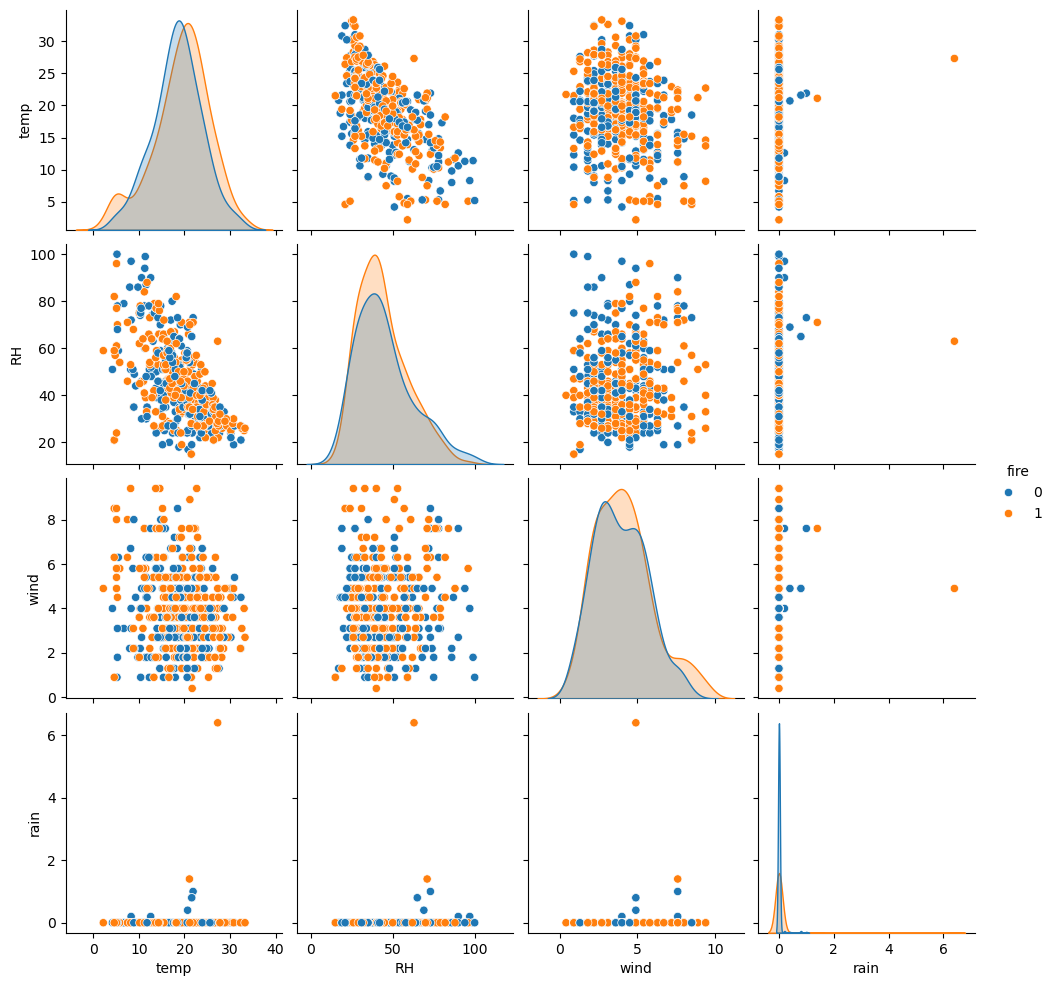

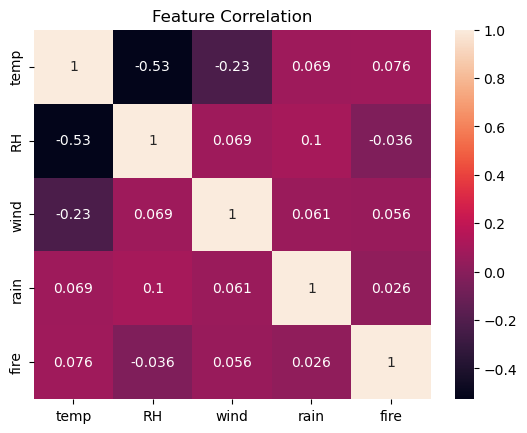

Accuracy: 0.6538461538461539
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        51
           1       0.66      0.66      0.66        53

    accuracy                           0.65       104
   macro avg       0.65      0.65      0.65       104
weighted avg       0.65      0.65      0.65       104



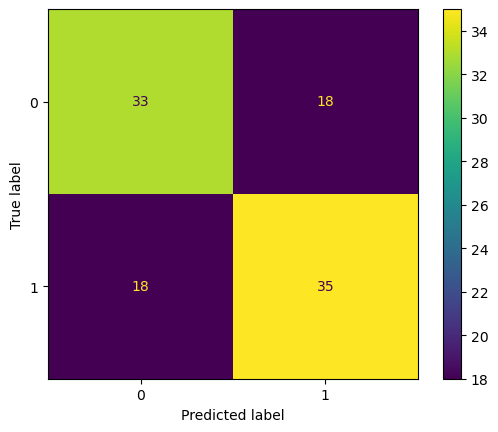

In [8]:
# 📦 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# 📂 Load Dataset
df = pd.read_csv("/Users/rahulchauhan/Desktop/rahul data sci/forestfires.csv")  # Replace with your path if needed
print(df.head())

# 🔧 Preprocess
df['fire'] = df['area'].apply(lambda x: 1 if x > 0 else 0)  # Binary label
features = ['temp', 'RH', 'wind', 'rain']  # Adjust based on your CSV headers
target = 'fire'

# 📊 Visualize
sns.pairplot(df[features + [target]], hue=target)
plt.show()

sns.heatmap(df[features + [target]].corr(), annot=True)
plt.title("Feature Correlation")
plt.show()

# 🧠 ML Model
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# 🔍 Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()


In [9]:
# 🔥 Forest Fire Prediction CLI App (Handles Missing Model File Gracefully)

# 📦 Imports
import pandas as pd
import joblib
import os

# 💾 Use the already trained model from previous cell
# model is already available

# 🧾 CLI Title
print("\n🔥 Forest Fire Risk Predictor")
print("-----------------------------------")

# 🎛️ User Inputs (Set values directly for Jupyter Notebook)
temp = 25.0   # Temperature (°C)
rh = 40.0     # Relative Humidity (%)
wind = 10.0   # Wind Speed (km/h)
rain = 0.0    # Rainfall (mm)

# You can change the above values as needed for prediction

# 🧠 Make Prediction
input_data = pd.DataFrame([[temp, rh, wind, rain]], columns=["temp", "RH", "wind", "rain"])
prediction = model.predict(input_data)[0]

# 🎯 Show Result
print("\n📊 Prediction Result:")
if prediction == 1:
    print("🚨 High Risk of Forest Fire!")
else:
    print("✅ Low Risk of Forest Fire.")



🔥 Forest Fire Risk Predictor
-----------------------------------

📊 Prediction Result:
🚨 High Risk of Forest Fire!
